In [257]:
import pandas as pd 
movie_data = pd.read_csv("CSV/Movies.csv",index_col=['id'])
cast_data = pd.read_csv("CSV/MovieCast.csv")

In [258]:

released_movies=movie_data[movie_data["released?"]=="Yes"].drop_duplicates()
box_office_movies=released_movies[released_movies.revenue.notnull()].drop_duplicates()
released_movies_cast=cast_data.loc[cast_data["movie_id"].isin(released_movies.index)].drop_duplicates()
box_office_movies_cast=cast_data.loc[cast_data["movie_id"].isin(box_office_movies.index)].drop_duplicates()


In [259]:
print(len(released_movies))
print(len(released_movies.drop_duplicates()))

4421
4421


In [260]:
most_movies=released_movies_cast.drop_duplicates()
most_movies=most_movies[most_movies.role=="Actor"].groupby("cast_id").movie_id.count().sort_values(ascending=False)
cast_names=released_movies_cast.drop_duplicates().groupby("cast_id").first()
cast_names=cast_names.merge(most_movies.to_frame(), left_index=True, right_index=True)
cast_names.sort_values(by=['movie_id_y'],ascending=False,inplace=True)
cast_names[0:10]

,movie_id_x,name,role,movie_id_y
cast_id,,,,
1069659,2034447,Mahmoud El Meleigy,Actor,375
1047283,2048605,Motawea Oweis,Actor,373
1075786,1010673,Abdelghani El Nagdi,Actor,359
1018181,2034447,Farid Shawqy,Actor,332
1093004,2034447,Hussain Ismael,Actor,306
1022304,1000036,Abdelmonem Ismail,Actor,290
1038038,1005775,Muhammad Abu Hasheesh,Actor,269
1095576,1010736,Mokhtar El Sayed,Actor,251
1096923,1000139,Mohamed Shawky,Actor,251


In [261]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(rc={'axes.facecolor':'#212529', 'figure.facecolor':'#212529','text.color':'#dee2e6','axes.labelcolor':'#dee2e6', 'xtick.color':'#dee2e6', 'ytick.color':'#dee2e6'},style={'axes.grid':False},font="Helvetica",context='talk')
sns.set_palette("Pastel1")
genre_data=pd.read_csv("CSV/MovieGenre.csv")
genre_data=genre_data.drop_duplicates()
movie_genres=released_movies.drop_duplicates().merge(genre_data, left_index=True,right_on=['movie_id'])
genre_by_year=movie_genres.groupby("release year").genre.value_counts()
#genre_by_year=movie_genres.pivot(index="release year",columns="genre",values=movie_genres.genre.value_counts())

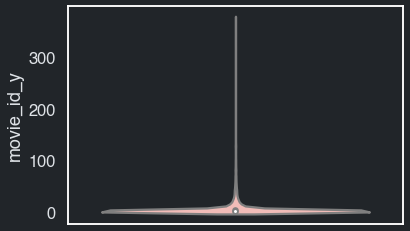

In [262]:
sns.violinplot(y=cast_names.movie_id_y)
plt.show()

In [326]:
cast_names.movie_id_y.mean()

5.764170841022937

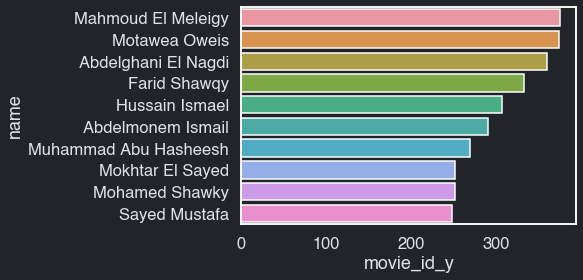

In [263]:
fig=sns.barplot(y=cast_names[0:10].name,x=cast_names[0:10].movie_id_y)

In [264]:

cast_released_by_year=released_movies_cast.loc[released_movies_cast.cast_id.isin(cast_names[0:5].index)]
cast_released_by_year=cast_released_by_year.merge(released_movies["release year"].to_frame(),left_on="movie_id",right_index=True)
cast_released_by_year=cast_released_by_year.loc[cast_released_by_year["release year"]>0]
# cast_released_by_year=cast_released_by_year.groupby("cast_id")["release year"].value_counts()
# cast_released_by_year.sort_index()
# cast_released_by_year=cast_released_by_year.rename(index=dict(zip(cast_names.index,cast_names.name)))
# cast_released_by_year=cast_released_by_year.rename_axis(index={'cast_id':'name'})
# cast_released_by_year=cast_released_by_year.rename("Movies")
# cast_released_by_year=cast_released_by_year.reset_index()
# cast_released_by_year
cast_released_by_year.drop_duplicates(inplace=True)
def top_5_index(x):
    switcher = {
        "Mahmoud El Meleigy":0,
        "Motawea Oweis":1,
        "Abdelghani El Nagdi":2,
        "Farid Shawqy":3,
        "Hussein Ismael":4
    }
    return switcher.get(x,5)
cast_released_by_year['i']=cast_released_by_year['name'].apply(top_5_index)
cast_released_by_year.sort_values('i',inplace=True)
cast_released_by_year.drop(columns=['i'],inplace=True)
cast_released_by_year=cast_released_by_year.loc[cast_released_by_year["role"]=="Actor"]
cast_released_by_year

,movie_id,cast_id,name,role,release year
184594,1009214,1069659,Mahmoud El Meleigy,Actor,1927
147556,1220499,1069659,Mahmoud El Meleigy,Actor,1960
147802,1055556,1069659,Mahmoud El Meleigy,Actor,1960
147942,1006606,1069659,Mahmoud El Meleigy,Actor,1960
148243,1004218,1069659,Mahmoud El Meleigy,Actor,1960
...,...,...,...,...,...
155947,1004791,1093004,Hussain Ismael,Actor,1957
137666,1011058,1093004,Hussain Ismael,Actor,1965
155793,1796447,1093004,Hussain Ismael,Actor,1957
136557,1003555,1093004,Hussain Ismael,Actor,1965


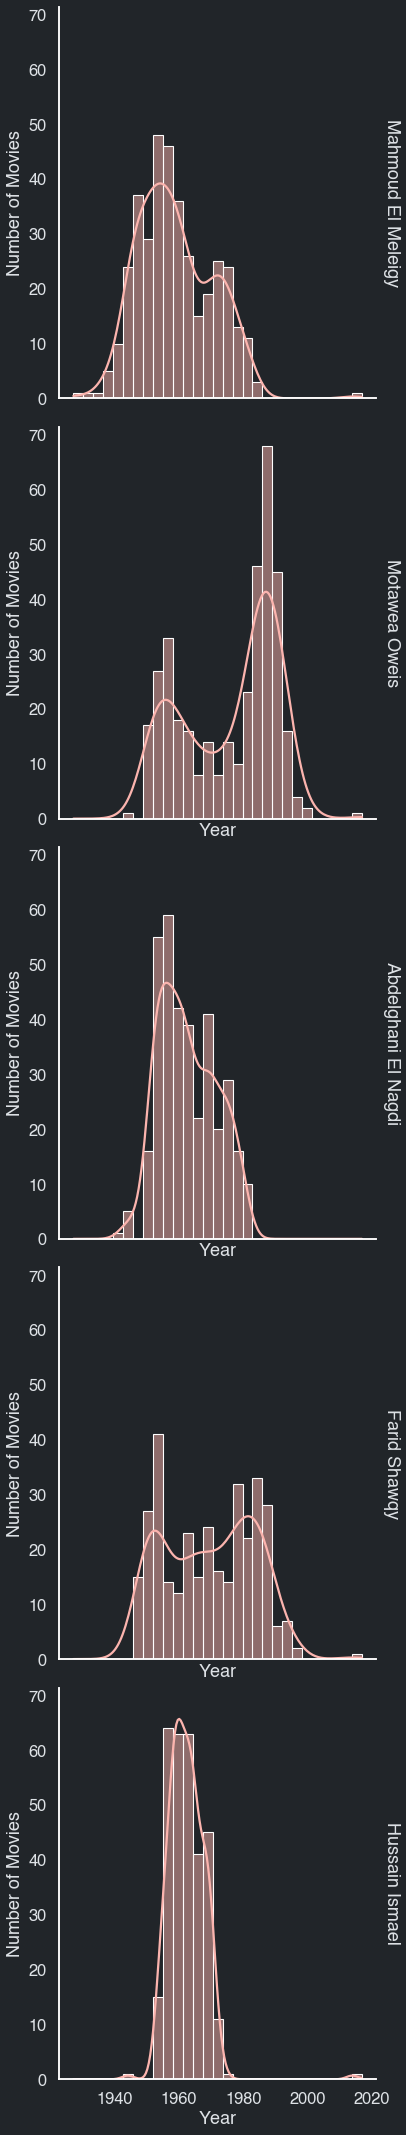

In [442]:
df = sns.displot(data=cast_released_by_year,x="release year",row="name", facet_kws=dict(margin_titles=True),height=6,aspect=1, kde=True)
df.set_titles(row_template='{row_name}')
df.set(xlabel="Year",ylabel="Number of Movies")
plt.show()
#p=sns.FacetGrid(data=cast_released_by_year,col="name")
#p.map(sns.lineplot,'release year','Movies')

In [320]:
cast_released_by_genre=released_movies_cast.loc[released_movies_cast.cast_id.isin(cast_names[0:5].index)]
cast_released_by_genre=cast_released_by_genre.loc[cast_released_by_genre.role=="Actor"]
cast_released_by_genre=cast_released_by_genre.merge(genre_data,left_on="movie_id",right_on="movie_id")
cast_released_by_genre=cast_released_by_genre.groupby("cast_id").genre.value_counts()
cast_released_by_genre.rename("count",inplace=True)
cast_released_by_genre=cast_released_by_genre.rename(index=dict(zip(cast_names.index,cast_names.name)))
cast_released_by_genre=cast_released_by_genre.rename_axis(index={'cast_id':'name'})
cast_released_by_genre=cast_released_by_genre.reset_index()
cast_released_by_genre

,name,genre,count
0,Farid Shawqy,Drama,194
1,Farid Shawqy,Thriller,43
2,Farid Shawqy,Comedy,36
3,Farid Shawqy,Crime,36
4,Farid Shawqy,Action,27
...,...,...,...
77,Hussain Ismael,Family,3
78,Hussain Ismael,Science Fiction,3
79,Hussain Ismael,Documentary,2
80,Hussain Ismael,War,2


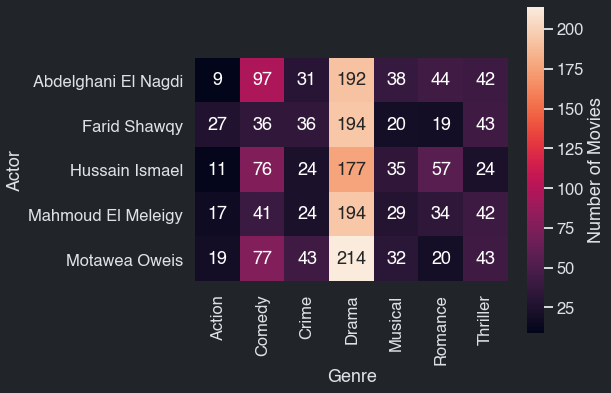

In [400]:
_map_data=cast_released_by_genre.loc[-cast_released_by_genre["genre"].isin(["Fantasy","History"])]
_map_data=_map_data.loc[_map_data["count"]>5]
fig, ax = plt.subplots(figsize=(7,6))
g=sns.heatmap(_map_data.pivot(index="name",columns="genre",values="count"),annot=True,fmt='d',ax=ax,square=True,cbar_kws={'label':'Number of Movies'})
g.set(ylabel="Actor",xlabel="Genre")
g.set_facecolor('xkcd:black')

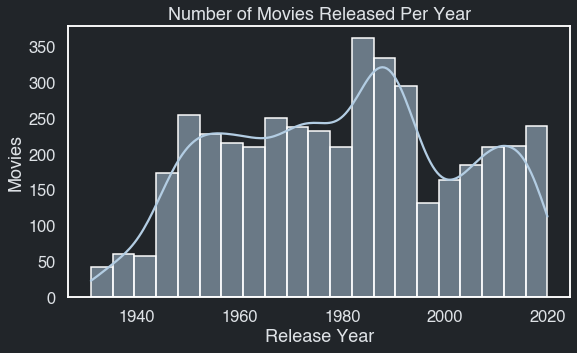

In [415]:

cast_per_year=released_movies_cast.merge(released_movies["release year"].to_frame(),left_on="movie_id",right_index=True)

cast_per_year=cast_per_year.loc[cast_per_year["release year"]>1930]
cast_per_year=cast_per_year.loc[cast_per_year["release year"]<2021]
movies_per_year=cast_per_year
cast_per_year=cast_per_year.loc[cast_per_year["role"]=="Actor"]
cast_per_year=cast_per_year[["release year","cast_id"]].drop_duplicates()

movies_per_year=movies_per_year[["release year","movie_id"]].drop_duplicates()
#plot_data=cast_per_year.merge(movies_per_year,how='outer',left_on="release year",right_on="release year")
fig, ax = plt.subplots(figsize=(9,5))
g=sns.histplot(data=movies_per_year, x="release year", kde=True,color=sns.color_palette("Pastel1")[1],ax=ax)
g.set(ylabel="Movies", xlabel="Release Year",title="Number of Movies Released Per Year")
plt.show()

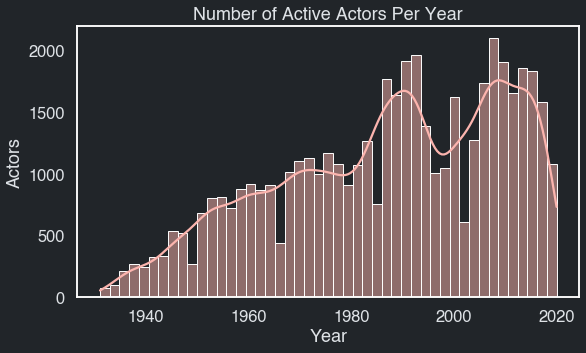

In [416]:
fig, ax = plt.subplots(figsize=(9,5))
g=sns.histplot(data=cast_per_year,x="release year",kde=True,ax=ax)
g.set(xlabel="Year",ylabel="Actors",title="Number of Active Actors Per Year")
plt.show()

,release year,cast_id
109,2021,1031917
110,2021,1110017
111,2021,1056639
112,2021,1107534
113,2021,1029470
...,...,...
184403,1931,1049027
184404,1931,1039459
184405,1931,1082141
184407,1931,1050296


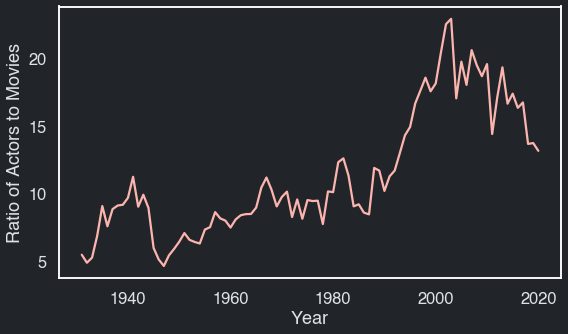

In [403]:
_cast_per_year=cast_per_year.groupby("release year").cast_id.count()
_movies_per_year=movies_per_year.groupby("release year").movie_id.count()
_cast_per_year.rename("Actors",inplace=True)
_movies_per_year.rename("Movies",inplace=True)
plot_data=pd.concat([_cast_per_year,_movies_per_year],axis=1)
plot_data['ratio']=plot_data['Actors']/plot_data['Movies']
#plot_data.loc[plot_data.index.isin(range(1980,2020))]
# sns.jointplot(data=plot_data,x="Movies",y="Actors",kind="reg")
fig, ax = plt.subplots(figsize=(9,5))
g=sns.lineplot(data=plot_data,x=plot_data.index,y="ratio",ax=ax)
g.set(ylabel="Ratio of Actors to Movies",xlabel="Year")
plt.show()

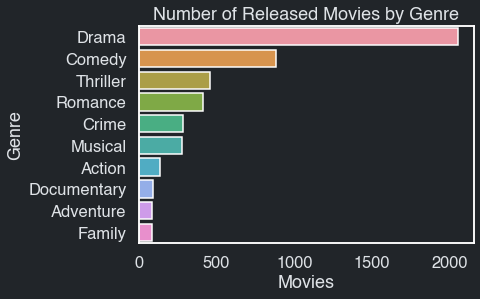

In [412]:
genre_count=movie_genres.groupby("genre").size()
genre_count.sort_values(ascending=False, inplace=True)
fig = sns.barplot(x=genre_count[0:10].values,y=genre_count[0:10].index)
fig.set(xlabel='Movies',ylabel="Genre",title='Number of Released Movies by Genre')
plt.show()


In [440]:
most_in_genre=released_movies_cast.loc[released_movies_cast.role=="Actor"]
most_in_genre=most_in_genre.merge(genre_data,left_on="movie_id",right_on="movie_id")
most_in_genre=most_in_genre.groupby("genre").cast_id.value_counts()
most_in_genre.rename("count",inplace=True)
most_in_genre.rename(index=dict(zip(cast_names.index,cast_names.name)),inplace=True)
#most_in_genre["Romance"]
most_in_genre=most_in_genre.reset_index()

most_in_genre.groupby("genre").first()


,cast_id,count
genre,,
Action,Farid Shawqy,27
Adventure,Abdulla Meshref,9
Animation,Saeed Saleh,2
Biography,Tawfik El Deken,6
Comedy,Ismail Yasin,103
Crime,Motawea Oweis,43
Documentary,Hassan El Adl,2
Drama,Motawea Oweis,214
Family,Hassan Hosny,11


In [406]:
drama_count=movie_genres.loc[movie_genres.genre=="Drama"]
print(len(drama_count))
print(len(released_movies))
comedy_count=movie_genres.loc[movie_genres.genre=="Comedy"]
print(len(comedy_count))
comedy_and_drama=drama_count.merge(comedy_count,left_on="movie_id",right_on="movie_id")
print(len(comedy_and_drama))

2051
4421
883
350


In [410]:
#genre_by_year=genre_by_year.rename("Genres by Year")
##genre_by_year=genre_by_year.reset_index()
genre_by_year

,release year,genre,Genres by Year
0,0,Drama,17
1,0,Comedy,3
2,0,Crime,1
3,0,Documentary,1
4,0,Musical,1
...,...,...,...
925,2020,History,1
926,2020,Mystery,1
927,2020,Short,1
928,2021,Comedy,3


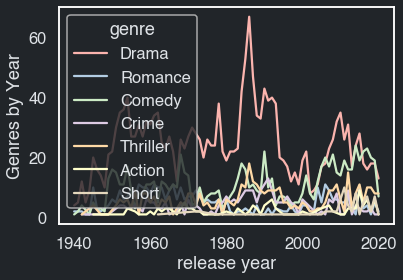

In [276]:
last_10_years=genre_by_year.loc[genre_by_year["release year"].isin(range(1940,2021)) ]
last_10_years=last_10_years.loc[genre_by_year["genre"].isin(['Action','Comedy','Crime','Drama','Romance','Short','Thriller'])]
# sns.heatmap(last_10_years.pivot(index="release year",columns="genre",values="Genres by Year"),annot=True)
sns.lineplot(data=last_10_years,x="release year",y="Genres by Year",hue="genre")
plt.show()